In [77]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
pip install ydata-profiling

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
#cols = pima.columns
#pima[cols]=pima[cols].apply(pd.to_numeric,errors='coerce')
#pima.dropna()

In [ ]:
pima.dtypes
#profile.to_widgets()

In [21]:

pima.info()
pima["label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: label, dtype: int64

In [78]:
profile = ProfileReport(pima, title="Profiling Report")

profile.to_file("Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
#check for missing data
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [22]:
#split features into independent and dependent variables
feature_cols = pima.columns[:-1] # get all columuns of dataset excluding the last output column
X= pima[feature_cols]
y = pima.label
X,y


(     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
 0           6      148  72    35        0  33.6     0.627   50
 1           1       85  66    29        0  26.6     0.351   31
 2           8      183  64     0        0  23.3     0.672   32
 3           1       89  66    23       94  28.1     0.167   21
 4           0      137  40    35      168  43.1     2.288   33
 ..        ...      ...  ..   ...      ...   ...       ...  ...
 763        10      101  76    48      180  32.9     0.171   63
 764         2      122  70    27        0  36.8     0.340   27
 765         5      121  72    23      112  26.2     0.245   30
 766         1      126  60     0        0  30.1     0.349   47
 767         1       93  70    31        0  30.4     0.315   23
 
 [768 rows x 8 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: label, Length: 768, dtype: int64)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=222 )

In [75]:

clf=DecisionTreeClassifier(criterion="gini",max_depth=4, max_leaf_nodes=7)
clf=clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)
train_preds =clf.predict(X_train)
test_preds = clf.predict (X_test)
print ("Train Accuracy : " , metrics.accuracy_score(y_train,train_preds),"Test Accuracy : " , metrics.accuracy_score(y_test,test_preds) , "Depth= " , maxdepth, "leaf = ", maxleafnodes)


Train Accuracy :  0.7914338919925512 Test Accuracy :  0.7359307359307359 Depth=  7 leaf =  9


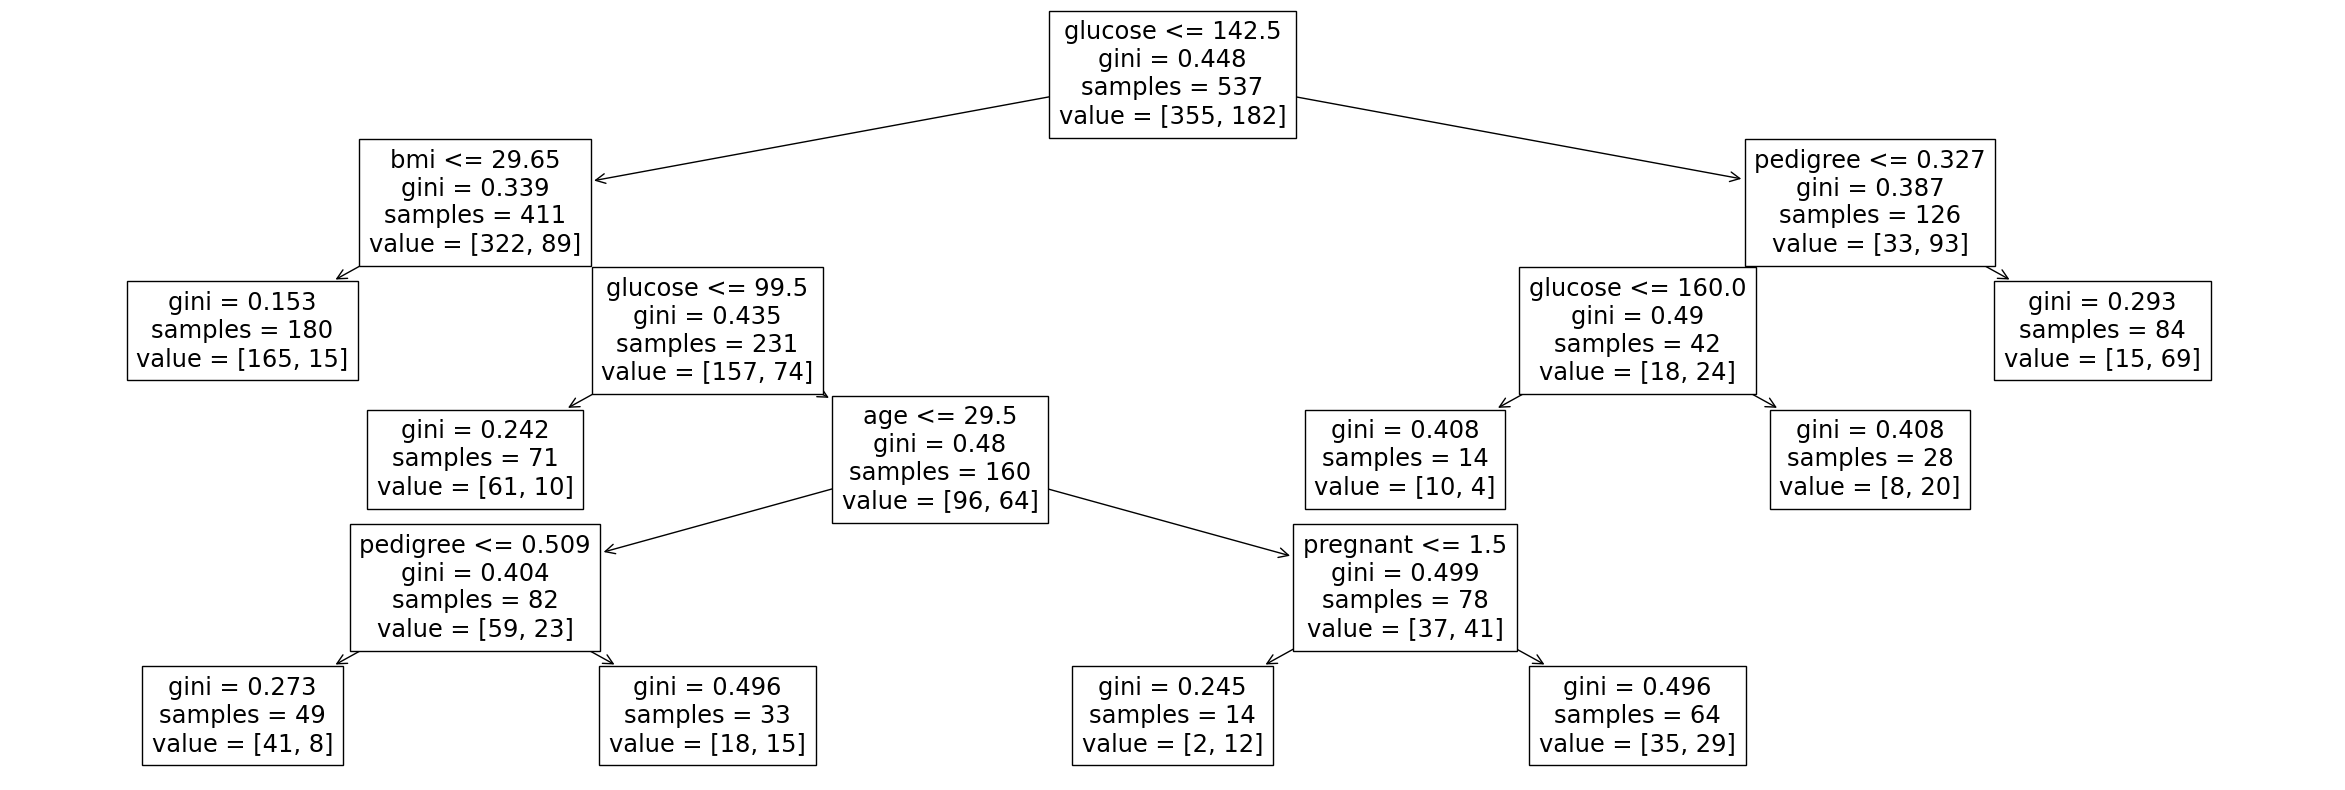

In [67]:
plt.figure(figsize=(30,10))
plot_tree(clf, feature_names=X.columns)
plt.show()

In [79]:
#find feature importance using the classifier
feature_importance_df= pd.DataFrame({
    "feature_names " : clf.feature_names_in_,
    "feature_importance" :clf.feature_importances_
})
feature_importance_df.sort_values(by=['feature_importance'],ascending=False)

,feature_names,feature_importance
1,glucose,0.760601
5,bmi,0.138327
7,age,0.058477
6,pedigree,0.042595
0,pregnant,0.000000
2,bp,0.000000
3,skin,0.000000
4,insulin,0.000000
